In [10]:
import numpy as np
from scipy.signal import fftconvolve
from scipy.misc import imread
import matplotlib.pyplot as plt
import pywt
%matplotlib inline

## Haar Wavelet Decomposition

In [11]:
def decompose(X, L, H, n):
    A_i = X.copy()
    D = []
    for i in range(n):
        D = [fftconvolve(A_i,H)[1::2]] + D
        A_i = fftconvolve(A_i,L)[1::2]
    return [A_i] + D

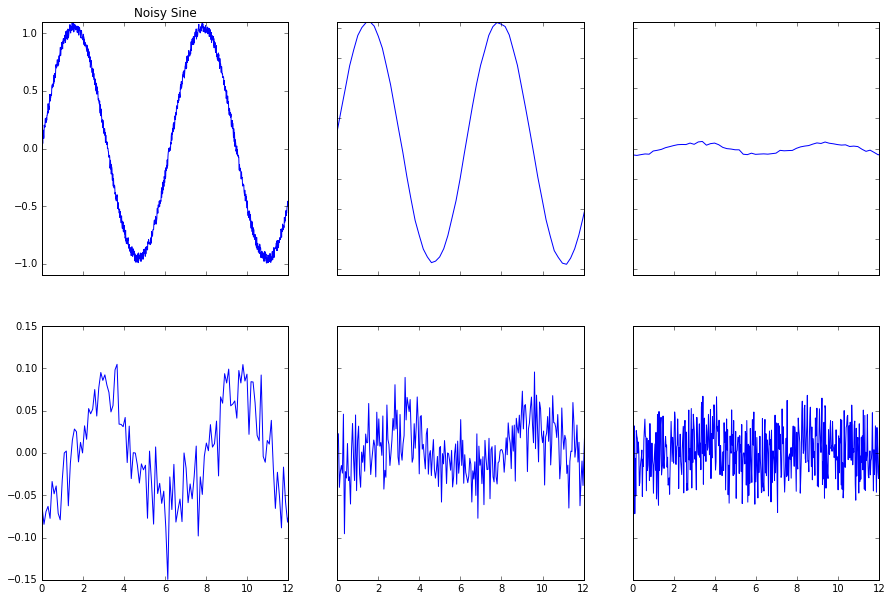

In [42]:
L = np.ones(2)/np.sqrt(2)
H = np.array([-1,1])/np.sqrt(2)

domain = np.linspace(0,4*np.pi,1024)
noise = np.random.random(1024)*0.1
noisysin = np.sin(domain) + noise
coeffs = decompose(noisysin, L, H, 4)

fig, ax = plt.subplots(sharex = True, sharey = True)
fig.set_figwidth(15)
fig.set_figheight(10)

dom = np.linspace(0,4*np.pi, len(noisysin))
plt.subplot(231)
plt.title("Noisy Sine")
plt.plot(dom, noisysin)
plt.axis([0,12,-1.1,1.1])
plt.tick_params(labelbottom='off')
#plt.ylim(-4.2,4.2)

for i,val in enumerate(coeffs):
    domain = np.linspace(0,4*np.pi, len(val))
    plt.subplot(2,3,i+2)
    plt.plot(domain, val)
    plt.axis([0,12,-4,4])
    if i+2 < 4:
        plt.ylim(-4.2,4.2)
        plt.tick_params(labelbottom='off')
    else:
        plt.ylim(-0.15,0.15)
    if i+2 != 4:
        plt.tick_params(labelleft='off')

plt.show()

#### The first subplot contains a sine wave with added noise, and the subsequent plots display the increasing frequencies contained in the noisy sine wave. Notice that the scale of noise reduces significantly for higher frequency "noise".

## Function Reconstruction

In [36]:
def inverse(ar):
    #the inverse of H is -H and the inverse of L is L
    A = ar[0]
    for D_i in ar[1:]:
        up_A = np.zeros(2*A.size)
        up_A[::2] = A
        up_D = np.zeros(2*D_i.size)
        up_D[::2] = D_i
        A = fftconvolve(up_A,L)[:-1] + fftconvolve(up_D, -H)[:-1]
    return A

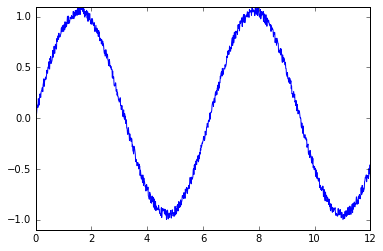

True

In [41]:
noisysin_2 = inverse(coeffs)
plt.plot(dom,noisysin_2)
plt.axis([0,12,-1.1,1.1])
plt.show()
np.allclose(noisysin,noisysin_2)

## Images and Wavelets

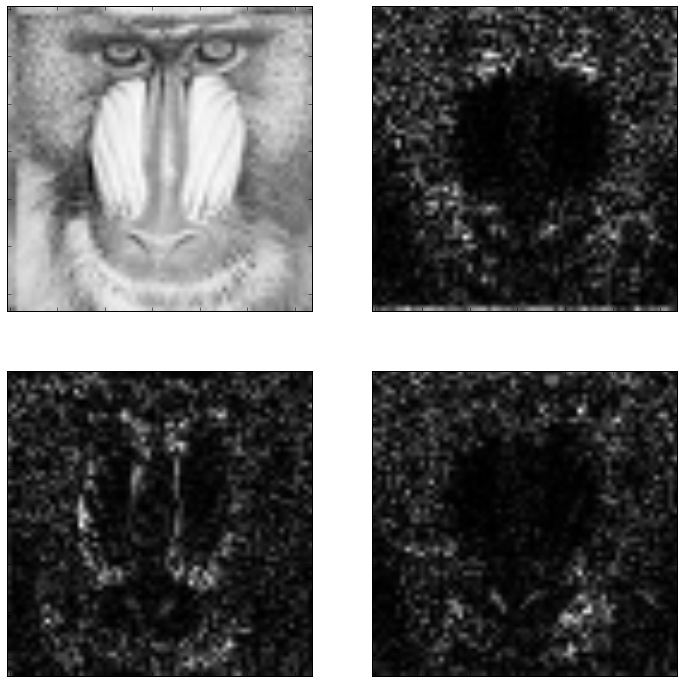

In [50]:
fig,ax = plt.subplots(sharex=True,sharey=True)

fig.set_figwidth(12)
fig.set_figheight(12)

mandrill = imread('mandrill.png', True)
lw = pywt.dwt2(mandrill, 'db4', mode='per')
plt.subplot(221)
plt.imshow(np.abs(lw[0]), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off')
plt.subplot(222)
plt.imshow(np.abs(lw[1][0]), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off')
plt.subplot(223)
plt.imshow(np.abs(lw[1][1]), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off')
plt.subplot(224)
plt.imshow(np.abs(lw[1][2]), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off')

plt.show()

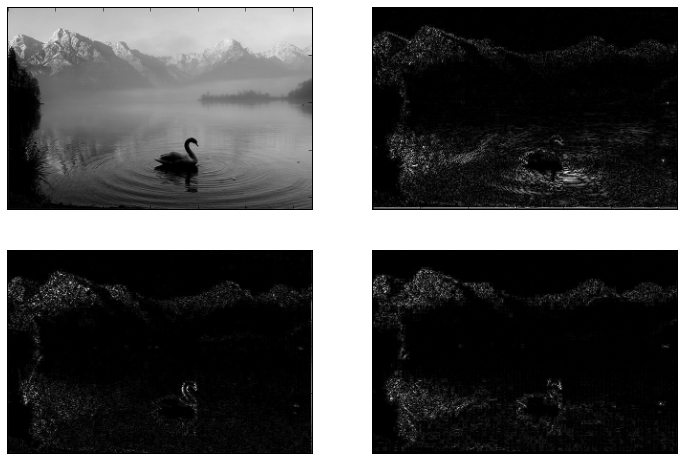

In [49]:
fig,ax = plt.subplots(sharex=True,sharey=True)

fig.set_figwidth(12)
fig.set_figheight(8)

swanlake = imread('swanlake_gray.jpg', True)
lw = pywt.dwt2(swanlake, 'db4', mode='per')
plt.subplot(221)
plt.imshow(np.abs(lw[0]), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off')
plt.subplot(222)
plt.imshow(np.abs(lw[1][0]), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off')
plt.subplot(223)
plt.imshow(np.abs(lw[1][1]), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off')
plt.subplot(224)
plt.imshow(np.abs(lw[1][2]), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off')
plt.show()

## Removing Image Noise

In [52]:
def image_clean(filename):
    image = imread(filename,True)
    wavelet = pywt.Wavelet('haar')
    WaveletCoeffs = pywt.wavedec2(image,wavelet)
    return pywt.waverec2(WaveletCoeffs[:-1], wavelet)

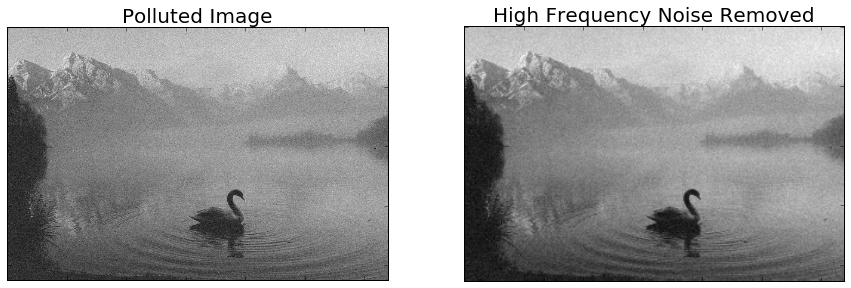

In [53]:
swanlake_polluted = imread('swanlake_polluted.jpg', True)
clean_image = image_clean('swanlake_polluted.jpg')

fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(8)

plt.subplot(121)
plt.title("Polluted Image", fontsize = 20)
plt.imshow(swanlake_polluted, cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off')

plt.subplot(122)
plt.title("High Frequency Noise Removed", fontsize = 20)
plt.imshow(clean_image, cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off')
plt.show()